# 1.Import Libraries

In [1]:
import pandas as pd #pandas library in python
import numpy as np  #numpy library in python
import matplotlib.pyplot as plt # visualization library 
import seaborn as sns           # visualization library
sns.set(color_codes = True)
%matplotlib inline

# 2. Import Data

In [2]:
data = pd.read_csv("TRAIN (1).csv") #Import training data
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


# 3.Data Visualization and cleaning
let's check with some visualization with given parameter.

In [3]:
# Let check null values and also check type of data.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   ID             188340 non-null  object 
 1   Store_id       188340 non-null  int64  
 2   Store_Type     188340 non-null  object 
 3   Location_Type  188340 non-null  object 
 4   Region_Code    188340 non-null  object 
 5   Date           188340 non-null  object 
 6   Holiday        188340 non-null  int64  
 7   Discount       188340 non-null  object 
 8   #Order         188340 non-null  int64  
 9   Sales          188340 non-null  float64
dtypes: float64(1), int64(3), object(6)
memory usage: 14.4+ MB


In [4]:
data["Date"] = data["Date"].astype("datetime64[ns]")

In [5]:
# Check each stores sales in overall data and also check which store made more sales. Following visualization you can see top 10 sales of each store.
amount_store = data.groupby('Store_id')['Sales'].mean().sort_values(ascending = False).reset_index()
top_20_amount_store = amount_store.head(20)
top_20_amount_store

,Store_id,Sales
0,175,101860.959593
1,337,95624.840930
2,126,89829.128895
3,312,86996.740756
4,146,84685.447035
5,160,83666.540814
6,153,79276.108023
7,354,75834.546279
8,173,72455.742733
9,87,71577.551686


In [6]:
# As you can see each store have particular store type and each store also done some sales to store, let check that how much sales had been done by each store type.
storetype_groupby = data.groupby('Store_Type')['Sales'].mean()
storetype_groupby

Store_Type
S1    37676.511694
S2    27530.828222
S3    47063.068209
S4    59945.685926
Name: Sales, dtype: float64

<AxesSubplot:xlabel='Store_Type'>

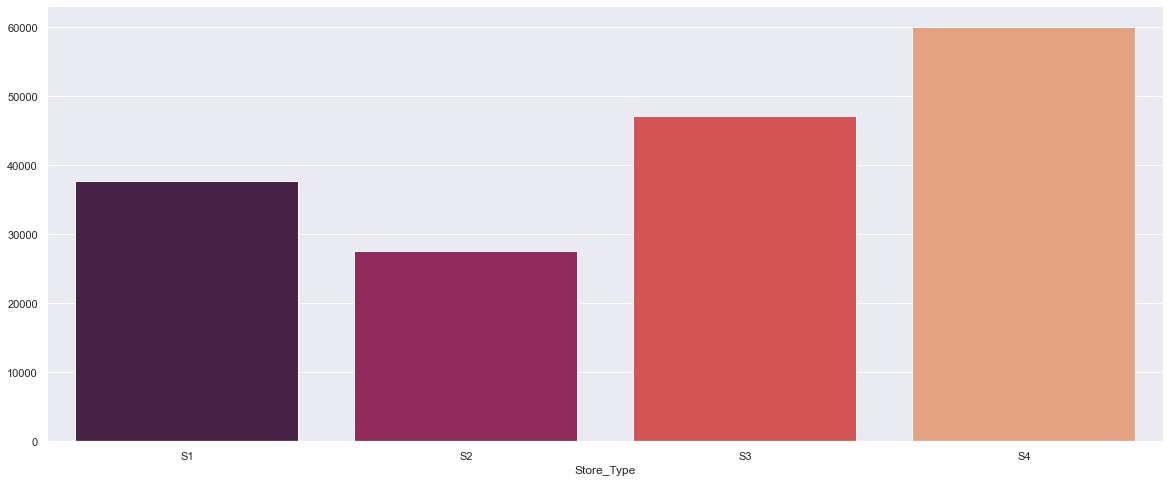

In [7]:
plt.figure(figsize = (20,8))
sns.barplot(x = storetype_groupby.index,y=storetype_groupby.values,palette = 'rocket')

In [8]:
#Each store having location and in particualr location there are so many stores under each location, lets check how much sales had been done by location wise.
storeloc_groupby = data.groupby('Location_Type')['Sales'].mean()
storeloc_groupby

Location_Type
L1    41453.597889
L2    59231.480373
L3    33072.257756
L4    29067.414313
L5    25187.787261
Name: Sales, dtype: float64

Text(0, 0.5, 'Mean of Sales of store type')

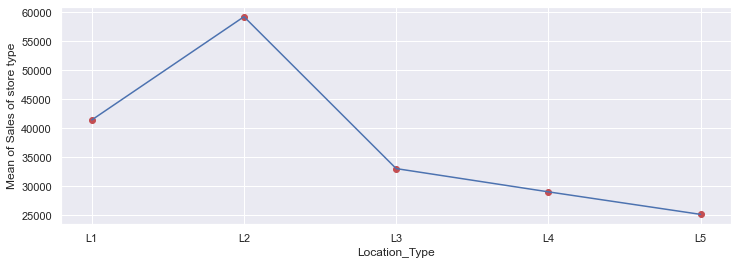

In [9]:
ax = sns.lineplot(x=storeloc_groupby.index, y= storeloc_groupby.values)
plt.scatter(x=storeloc_groupby.index, y= storeloc_groupby.values, c = 'r')
ax.figure.set_figwidth(12)
ax.figure.set_figheight(4)
ax.set_ylabel("Mean of Sales of store type")

In [10]:
# Lets check sales according to region wise.
region_groupby = data.groupby('Region_Code')['Sales'].mean()
region_groupby

Region_Code
R1    46765.488405
R2    40054.847344
R3    42144.517063
R4    39743.434249
Name: Sales, dtype: float64

([0, 1, 2, 3],
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

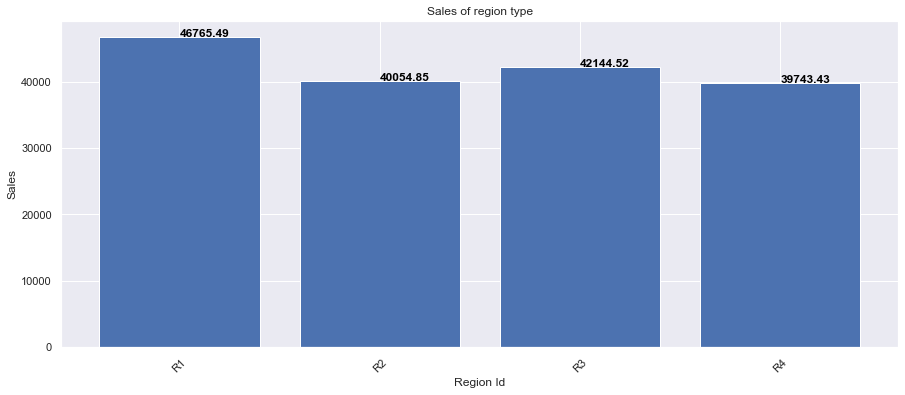

In [11]:
fig, ax = plt.subplots()
fig.set_figwidth(15)
fig.set_figheight(6)
ax.bar(x = region_groupby.index, height =  region_groupby.values)
ax.set_xlabel('Region Id')
ax.set_ylabel('Sales')
ax.set_title('Sales of region type')
for i, v in enumerate(region_groupby.values):
    ax.text(i, v, s = ("%.2f" % v), color='black', fontweight='bold', fontsize = 12) # %.2f will print decimals upto 2 places
plt.xticks(rotation=45) # this line will rotate the x axis label in 45 degrees to make it more readable

In [12]:
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [13]:
# Each store done sales for each date, lets check about highest sales of store,whether on which particular date that store is generated maximum sales.
highest_sale_store = data[data['Store_id']==175]
top_10_days_highest_sale_store = highest_sale_store.sort_values(by = 'Sales',ascending = False).head(10)
top_10_days_highest_sale_store

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
178648,T1178649,175,S4,L2,R1,2019-05-05,0,Yes,371,247215.00
178304,T1178305,175,S4,L2,R1,2019-05-04,0,Yes,348,222516.00
68703,T1068704,175,S4,L2,R1,2018-07-08,0,Yes,333,203337.00
155790,T1155791,175,S4,L2,R1,2019-03-03,0,Yes,347,200742.00
183128,T1183129,175,S4,L2,R1,2019-05-17,0,Yes,309,199839.00
183251,T1183252,175,S4,L2,R1,2019-05-18,1,No,361,197840.61
156109,T1156110,175,S4,L2,R1,2019-03-04,1,No,293,196727.16
182587,T1182588,175,S4,L2,R1,2019-05-16,0,Yes,294,187428.00
128679,T1128680,175,S4,L2,R1,2018-12-19,0,Yes,269,187077.00
136956,T1136957,175,S4,L2,R1,2019-01-11,0,Yes,273,186444.00


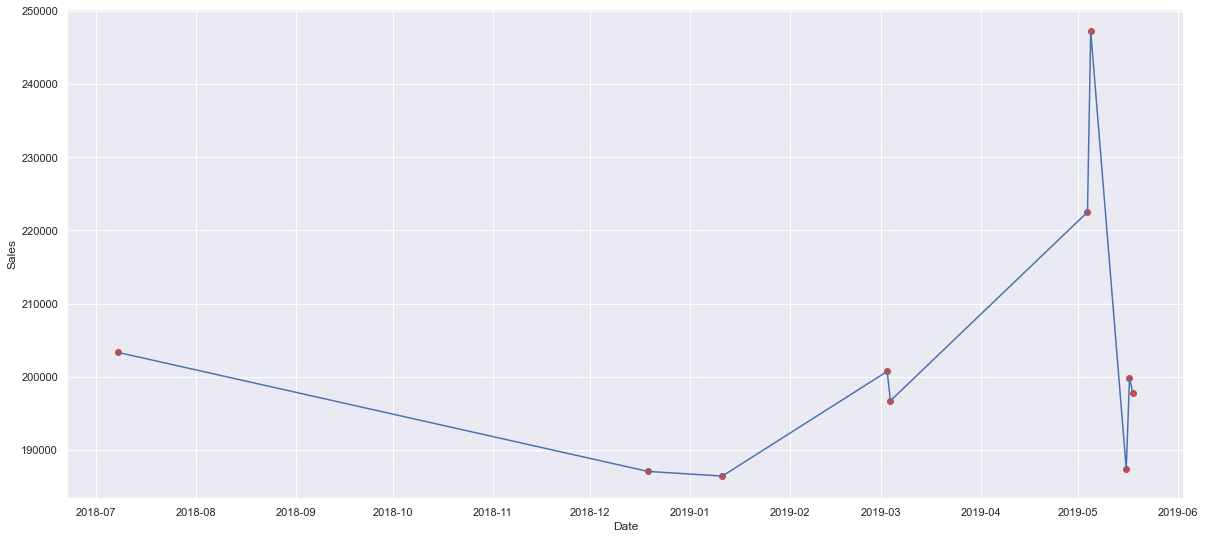

In [14]:
plt.figure(figsize = (20,9))
sns.lineplot(x = 'Date',y = 'Sales',data= top_10_days_highest_sale_store)
plt.scatter(x='Date', y= 'Sales',data =top_10_days_highest_sale_store,  c = 'r')

In [15]:
# paricular date wise lets check how much sales had been done.
date_groupby = data.groupby('Date')['Sales'].sum().reset_index().sort_values(by='Sales',ascending = False).head(10)
date_groupby

,Date,Sales
488,2019-05-04,26870817.00
124,2018-05-05,24441480.00
27,2018-01-28,24070617.00
187,2018-07-07,24055308.00
376,2019-01-12,24039663.00
181,2018-07-01,23945358.00
180,2018-06-30,23728515.00
377,2019-01-13,23345691.42
485,2019-05-01,22924065.00
4,2018-01-05,22902651.00


<AxesSubplot:xlabel='Date', ylabel='Sales'>

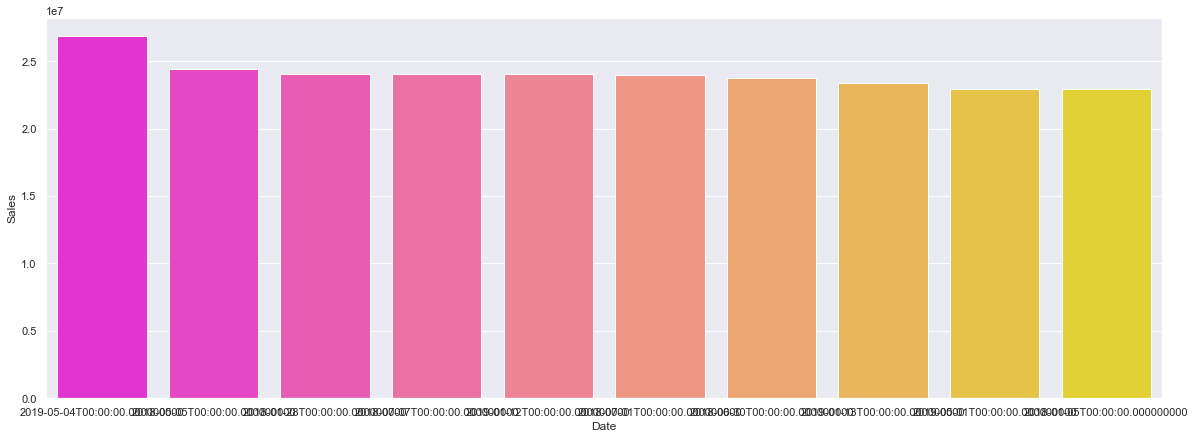

In [16]:
plt.figure(figsize=(20,7))
sns.barplot(x = 'Date',y='Sales',data = date_groupby,palette = 'spring')

As we done visualization on sales parameter, same we can do on order as well.let's see with orders whether which store had max order and also we will be going to see region, location and store type as well.

In [17]:
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


<AxesSubplot:xlabel='Store_id', ylabel='#Order'>

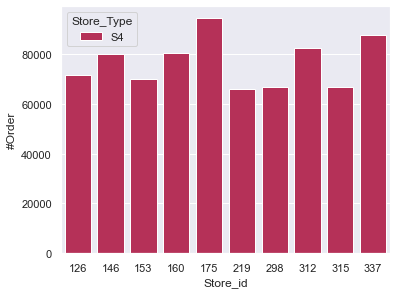

In [18]:
plt.subplots(figsize=(20,10))

#In the plot you can see sum of all the order of store and also you can see which store type had more orders.
plt.subplot(231)
store_order_groupby = data.groupby(['Store_id','Store_Type']).sum().reset_index().sort_values(by = '#Order',ascending = False).head(10)
sns.barplot(x = 'Store_id',y = '#Order',hue = 'Store_Type',data = store_order_groupby,palette = 'rocket')


<AxesSubplot:ylabel='Sales'>

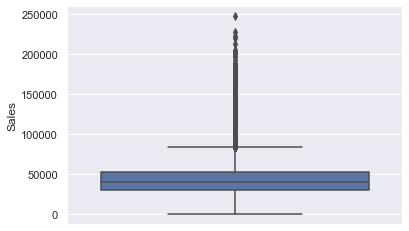

In [19]:
#Data having outliers and thus we may face more error so lets tackle with outliers.
sns.boxplot(y = 'Sales',data = data)

# 3.Data Preprocessing
- Start with Preprocessing, let again import the data or you can copy same data, i would prefer to go with fresh data.
- In preprocessing, I convert categorical features into numerical one, also those features are not important for buidling model or predicting sales values those features are removed and also as we have date columns and this also very important feature for predicting sales values so convert this into single-single column and finally go with model selection. For neat and clean code I removed other alogorthims and took only that model which is giving high accuracy. 

In [21]:
data = pd.read_csv('TRAIN (1).csv')
data.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [22]:
#We have some Categorical features are present, for converting these categorical features into numerical I had used ordinal encoding and also i checked with nominal encoding and as compared to nominal I am getting more accuracy in ordinal encoding.
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
data['Store_Type'] = label.fit_transform(data['Store_Type'])
data['Location_Type'] = label.fit_transform(data['Location_Type'])
data['Region_Code'] = label.fit_transform(data['Region_Code'])

data['Discount']= pd.get_dummies(data['Discount'])

In [23]:
# Date column is in format of 'y-m-d', as we know model does not understand datetime format. Lets separate date, month and year column.
data['Year']=data['Date'].str.split('-').str[0]
data['Month']=data['Date'].str.split('-').str[1]
data['Date']=data['Date'].str.split('-').str[2]

data['Date']=data['Date'].astype(int)
data['Month']=data['Month'].astype(int)
data['Year']=data['Year'].astype(int)

In [25]:
# Assign Dependent and independent features.
x = data.drop(['Store_id','Sales','#Order','ID'],axis = 1)
y = data.loc[:,['Sales']]

In [27]:
#some features having different units, normalize the feature. 
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std_x = std.fit_transform(x)
std_x

array([[-0.92021484,  0.77942573, -1.11825327, ..., -1.11106042,
        -0.64319408, -1.32317704],
       [ 1.48464256, -0.03573298, -1.11825327, ..., -1.11106042,
        -0.64319408, -1.32317704],
       [ 0.68302343, -0.03573298, -1.11825327, ..., -1.11106042,
        -0.64319408, -1.32317704],
       ...,
       [-0.92021484,  0.77942573, -0.16236933, ...,  0.90004106,
         1.55474067, -0.14651292],
       [ 0.68302343, -0.8508917 , -0.16236933, ..., -1.11106042,
         1.55474067, -0.14651292],
       [-0.11859571, -0.8508917 , -1.11825327, ...,  0.90004106,
         1.55474067, -0.14651292]])

In [28]:
#for validating data we have different methods , lets check with train-test-split.
from sklearn.model_selection import train_test_split

# Train & Test split
x_train, x_test, y_train, y_test = train_test_split(std_x,y,test_size=0.20,
                                                    random_state=42)

print('Shape of Training Xs:{}'.format(x_train.shape))
print('Shape of Test Xs:{}'.format(x_test.shape))
print('Shape of Training y:{}'.format(y_train.shape))
print('Shape of Test y:{}'.format(y_test.shape))

Shape of Training Xs:(150672, 8)
Shape of Test Xs:(37668, 8)
Shape of Training y:(150672, 1)
Shape of Test y:(37668, 1)


# 4.Build model with hyperparameter tuning

In [29]:
from sklearn.model_selection import RandomizedSearchCV
#Randomized Search CV
alpha = [1,4,7,10,0.1,15]

max_iter = [1500,2000,2500,3000]

random_state = [20,30,40,50,35,21]

In [30]:
# Create the random grid
random_grid = {'alpha': alpha,
               'max_iter': max_iter,
               'random_state': random_state,
               }

print(random_grid)

{'alpha': [1, 4, 7, 10, 0.1, 15], 'max_iter': [1500, 2000, 2500, 3000], 'random_state': [20, 30, 40, 50, 35, 21]}


In [31]:
from sklearn.linear_model import Lasso
model = Lasso()

In [70]:
# Random search of parameters, using 3 fold cross validation, 
# search across 50 different combinations
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs = 1)

In [71]:
rf_random.fit(x_train,y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
[CV] END ..........alpha=0.1, max_iter=3000, random_state=50; total time=   0.0s
[CV] END ..........alpha=0.1, max_iter=3000, random_state=50; total time=   0.0s
[CV] END ..........alpha=0.1, max_iter=3000, random_state=50; total time=   0.0s
[CV] END ............alpha=1, max_iter=3000, random_state=30; total time=   0.0s
[CV] END ............alpha=1, max_iter=3000, random_state=30; total time=   0.0s
[CV] END ............alpha=1, max_iter=3000, random_state=30; total time=   0.0s
[CV] END ...........alpha=10, max_iter=2000, random_state=35; total time=   0.0s
[CV] END ...........alpha=10, max_iter=2000, random_state=35; total time=   0.0s
[CV] END ...........alpha=10, max_iter=2000, random_state=35; total time=   0.0s
[CV] END ..........alpha=0.1, max_iter=1500, random_state=30; total time=   0.0s
[CV] END ..........alpha=0.1, max_iter=1500, random_state=30; total time=   0.0s
[CV] END ..........alpha=0.1, max_iter=1500, ra

RandomizedSearchCV(cv=3,
                   estimator=Lasso(alpha=0.1, max_iter=3000, random_state=50),
                   n_iter=50, n_jobs=1,
                   param_distributions={'alpha': [1, 4, 7, 10, 0.1, 15],
                                        'max_iter': [1500, 2000, 2500, 3000],
                                        'random_state': [20, 30, 40, 50, 35,
                                                         21]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [72]:
#Check best parameter using hyperparameter.
rf_random.best_params_

{'random_state': 50, 'max_iter': 3000, 'alpha': 0.1}

In [81]:
#Check Accuracy on best parameter and predict y value for test data.
model = Lasso(random_state= 50, max_iter =  3000, alpha= 0.1)
model.fit(x_train,y_train)
score = model.score(x_test,y_test)
y_predicted = model.predict(x_test)


In [82]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(y_test,y_predicted)

0.13584991548405945

- Add test data, apply model on test data and check MSLE. before applying perprocess data first which was done on training data.
-  Now perform same operations which we already perform on training data and predict sales values

In [55]:
# Add test data.
test = pd.read_csv("TEST_FINAL.csv")
test.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount
0,T1188341,171,S4,L2,R3,2019-06-01,0,No
1,T1188342,172,S1,L1,R1,2019-06-01,0,No
2,T1188343,173,S4,L2,R1,2019-06-01,0,No
3,T1188344,174,S1,L1,R4,2019-06-01,0,No
4,T1188345,170,S1,L1,R2,2019-06-01,0,No


In [56]:
test['Year']=test['Date'].str.split('-').str[0]
test['Month']=test['Date'].str.split('-').str[1]
test['Date']=test['Date'].str.split('-').str[2]

test['Date']=test['Date'].astype(int)
test['Month']=test['Month'].astype(int)
test['Year']=test['Year'].astype(int)

In [57]:
test= test.drop(['Store_id','ID'],axis = 1)


In [58]:
test['Store_Type'] = label.fit_transform(test['Store_Type'])
test['Location_Type'] = label.fit_transform(test['Location_Type'])
test['Region_Code'] = label.fit_transform(test['Region_Code'])

test['Discount']= pd.get_dummies(test['Discount'])


In [60]:
std_test = std.fit_transform(test)
std_test

array([[ 1.48464256, -0.03573298,  0.79351462, ...,  0.86204991,
         0.        , -1.01653005],
       [-0.92021484, -0.8508917 , -1.11825327, ...,  0.86204991,
         0.        , -1.01653005],
       [ 1.48464256, -0.03573298, -1.11825327, ...,  0.86204991,
         0.        , -1.01653005],
       ...,
       [-0.92021484, -0.8508917 ,  0.79351462, ..., -1.16002565,
         0.        ,  0.98373875],
       [-0.92021484, -0.8508917 ,  1.74939856, ...,  0.86204991,
         0.        ,  0.98373875],
       [-0.11859571, -0.8508917 , -0.16236933, ...,  0.86204991,
         0.        ,  0.98373875]])

In [61]:
Sales = model.predict(std_test)
Sales

array([51073.27068013, 35133.68870732, 52020.05243237, ...,
       45373.35359183, 32710.77755379, 40488.60518505])

In [65]:
sales_values = {'Sales':Sales}
#data_frame = pd.DataFrame(sales_values,Index = ('Sales'))
data_frame = pd.DataFrame(sales_values) 

data_frame.to_csv('LASSO_sales.csv')

In [63]:
sample = pd.read_csv('SAMPLE.csv')
sales = sample.iloc[:,-1]
sales

0        42275
1        42275
2        42275
3        42275
4        42275
         ...  
22260    42275
22261    42275
22262    42275
22263    42275
22264    42275
Name: Sales, Length: 22265, dtype: int64

In [79]:
from sklearn.metrics import mean_squared_log_error
mean_squared_log_error(sales,Sales)

0.09201445998929621

# Description

#### Following points would be discussed below.
###### -Brief on the approach.
###### -What data-preprocessing / feature engineering ideas really worked? How did you discover them?
###### -What does your final model look like? How did you reach it?


### Brief on the approach
- Whenever I see the data, firstly I will check whether data having null values, Imbalanced data,Categorical features and outliers. To check these all parameter I did visualization and using matplotlib and seaborn packages I validate above parameter that you can check in noebook.
- After validating my approach is towards normalizing data and go for validation.Train-test-split validation method used and later go for model selction.
- While model selection, based on data type whether data is linearly separable whether data is highly non linear based on this I checked with different algorithms and finally I Select the LASSO regression.
- Why LASSO? because data is giving better accuracy on LASSO, also MSLE error is less as compared to other algorithms.

### What data-preprocessing / feature engineering ideas really worked? How did you discover them?
- In the data there are some Categorical values, to convert into numerical I check with nominal encoding(one_hot) and also check ordinal(label encoding) based on both the results the preferable one is label encoding that giving good accuracy with less error.
- In Data-preprocessing, for normalizing data I uesd min-max and standard scaling. I got better accuracy and less error in Standard scaling.

### What does your final model look like? How did you reach it?
- Finally, my model is built based on good result and analytics vidhya scorecard at the last moment I tried to reduce error and achieve max Accuracy.
- I achived final model by performing and analysing alot more other algorithms and , finally I got my final model.